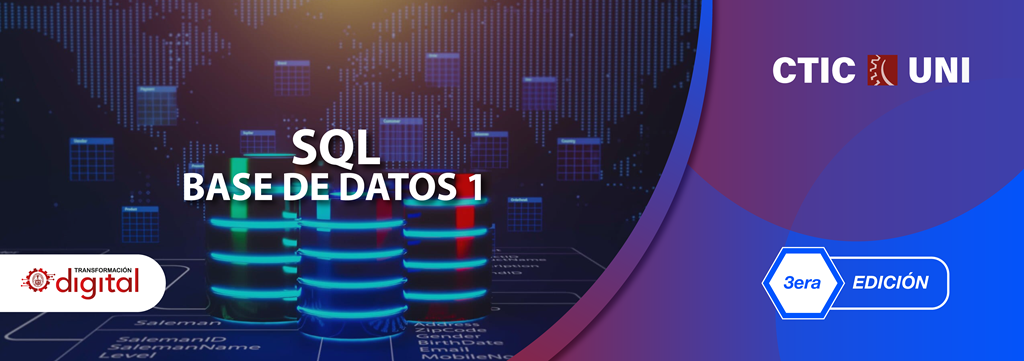

<table border=1 width='99%'>
<tr>
<td bgcolor='#B00A0F'>

# **<font color="#FFFFFF">MÓDULO 3.- CONSULTAS EN SQL SERVER</font>**
</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000">  Consultas de Selección (SELECT)</font>**

</td>
</tr>
</table>

La orden **SELECT** en SQL es fundamental para recuperar y consultar datos de una base de datos.

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> Sintaxis </font>**

</td>
</tr>
</table>

```
SELECT columna1, columna2, ...
FROM nombre_tabla
```

```
SELECT columna1, columna2, ...
FROM nombre_tabla
WHERE condición
```

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> Ejemplo de * </font>**

</td>
</tr>
</table>

Este comando se utiliza para seleccionar todos los registros de la tabla Beneficiario.

El asterisco (*) significa que se seleccionarán todas las columnas disponibles en esa tabla.



```
USE pvl
GO
SELECT * FROM Beneficiario
GO
```



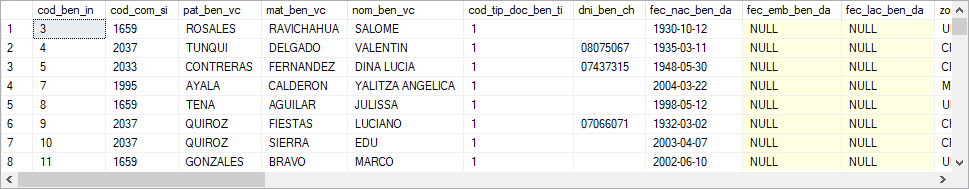

Esta es una consulta SQL que se utiliza para recuperar datos de una base de datos.

En este caso, estás especificando las columnas que deseas obtener de la tabla Beneficiario.

>* cod_ben_in: Código de beneficiario (Identificador único).
>* pat_ben_vc: Apellido paterno del beneficiario.
>* mat_ben_vc: Apellido materno del beneficiario.
>* nom_ben_vc: Nombre del beneficiario.
>* fec_nac_ben_da: Fecha de nacimiento del beneficiario.
>* dni_ben_ch: Documento de identidad del beneficiario.
>* cod_sex_bi: Código de sexo del beneficiario.



```
USE pvl
GO
SELECT
	cod_ben_in,
	pat_ben_vc,
	mat_ben_vc,
	nom_ben_vc,
	fec_nac_ben_da,
	dni_ben_ch,
	cod_sex_bi
FROM Beneficiario
GO
```



<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> Uso de los Alías </font>**
</td>
</tr>
</table>

Los alias se utilizan en SQL para renombrar columnas o tablas en el resultado de una consulta.

Esto puede hacer que los resultados sean más legibles y comprensibles.



```
USE pvl
GO
SELECT
	cod_ben_in AS Código,
	pat_ben_vc AS Paterno,
	mat_ben_vc AS Materno,
	nom_ben_vc AS Nombres,
	fec_nac_ben_da AS [Fecha de Nacimiento],
	dni_ben_ch AS DNI,
	cod_sex_bi AS Sexo
FROM Beneficiario
GO
```





```
USE pvl
GO
SELECT
	cod_ben_in Código,
	pat_ben_vc Paterno,
	mat_ben_vc Materno,
	nom_ben_vc Nombres,
	fec_nac_ben_da [Fecha de Nacimiento],
	dni_ben_ch DNI,
	cod_sex_bi Sexo
FROM Beneficiario
GO
```





```
USE pvl
GO
SELECT
	Código = cod_ben_in,
	Paterno = pat_ben_vc,
	Materno = mat_ben_vc,
	Nombres = nom_ben_vc,
	'Fecha de Nacimiento' = fec_nac_ben_da,
	DNI = dni_ben_ch,
	Sexo = cod_sex_bi
FROM Beneficiario
GO
```



<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF">Formatos de fecha y hora </font>**
</td>
</tr>
</table>



```
SELECT GETDATE()
```





```
-- 0 .. 14: Muestra el año con sus dos últimas cifras
SELECT CONVERT(VARCHAR(200), GETDATE(), 0) AS Fecha
SELECT CONVERT(VARCHAR(200), GETDATE(), 1) AS Fecha
SELECT CONVERT(VARCHAR(200), GETDATE(), 2) AS Fecha
SELECT CONVERT(VARCHAR(200), GETDATE(), 3) AS Fecha
SELECT CONVERT(VARCHAR(200), GETDATE(), 8) AS Hora
SELECT CONVERT(VARCHAR(200), GETDATE(), 14) AS Hora
-- 100 .. 114: Muestra el año con cuatro cifras
SELECT CONVERT(VARCHAR(200), GETDATE(), 100) AS Fecha
SELECT CONVERT(VARCHAR(200), GETDATE(), 101) AS Fecha
SELECT CONVERT(VARCHAR(200), GETDATE(), 102) AS Fecha
SELECT CONVERT(VARCHAR(200), GETDATE(), 103) AS Fecha
SELECT CONVERT(VARCHAR(200), GETDATE(), 108) AS Hora
SELECT CONVERT(VARCHAR(200), GETDATE(), 114) AS Hora
SELECT CONVERT(VARCHAR(200), GETDATE(), 120) AS Hora
```





```
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    fec_nac_ben_da AS [Fecha de Nacimiento],
	CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    cod_sex_bi AS Sexo
FROM Beneficiario
GO
```





```
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
	CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    cod_sex_bi AS Sexo,
	DATEDIFF(DAY, fec_nac_ben_da, '20040731') AS Días,
	DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004 AS Edad1,
	CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) AS Edad,
	CONVERT(INT, DATEDIFF(YEAR, fec_nac_ben_da, '20040731')) AS Edad
FROM Beneficiario
WHERE
	CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004)
	<>
	CONVERT(INT, DATEDIFF(YEAR, fec_nac_ben_da, '20040731'))
GO
```





```
-- Salome
UPDATE Beneficiario
SET cod_sex_bi = 0
WHERE cod_ben_in = 3
GO
```



<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> IIF </font>**
</td>
</tr>
</table>

IIF es una función condicional en SQL Server que permite realizar evaluaciones lógicas en una consulta.

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

#### **<font color="#000000"> Sintaxis</font>**
</td>
</tr>
</table>

```
IIF(condición, valor_si_verdadero, valor_si_falso)
```



```
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
	CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo,
	CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) AS Edad
FROM Beneficiario
GO
```



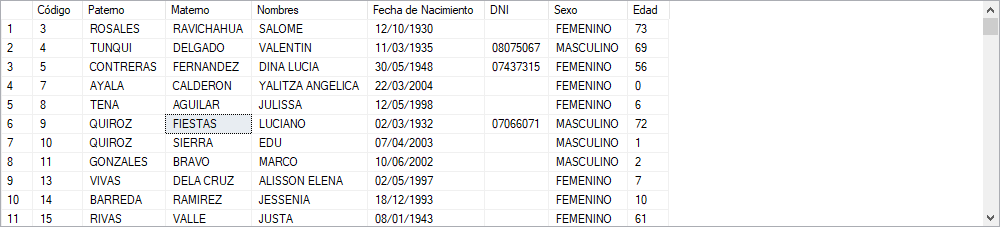

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> CASE </font>**
</td>
</tr>
</table>

La sentencia CASE en SQL es una forma de realizar evaluaciones condicionales en tus consultas, similar a una estructura if-else en otros lenguajes de programación.

Permite devolver diferentes resultados según las condiciones especificadas.



```
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
	CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CASE cod_sex_bi
		WHEN 0 THEN 'FEMENINO'
		WHEN 1 THEN 'MASCULINO'
		ELSE 'OTRO'
	END AS Sexo,
	CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) AS Edad
FROM Beneficiario
GO
```





```
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CASE
        WHEN cod_sex_bi = 0 THEN 'FEMENINO'
        WHEN cod_sex_bi = 1 THEN 'MASCULINO'
        ELSE 'OTRO'
    END AS Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) AS Edad
FROM Beneficiario
GO
```





```
USE master
GO
SELECT DISTINCT xtype
FROM sysobjects
GO
```





```
USE master
GO
SELECT xtype
FROM sysobjects
GROUP BY xtype
GO
```





```
USE master
GO
SELECT xtype, COUNT(*) AS Cantidad
FROM sysobjects
GROUP BY xtype
ORDER BY 2 DESC
GO
```



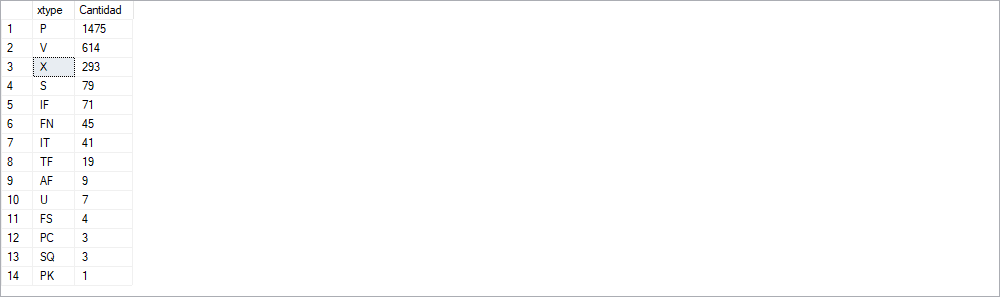



```
USE master
GO
SELECT
	xtype AS Tipo,
	CASE xtype
		WHEN 'AF' THEN 'Función de agregado (CLR)'
		WHEN 'C' THEN 'Restricción CHECK'
		WHEN 'D' THEN 'Valor predeterminado o restricción DEFAULT'
		WHEN 'F' THEN 'Restricción FOREIGN KEY'
		WHEN 'L' THEN 'Registro'
		WHEN 'FN' THEN 'Función escalar'
		WHEN 'FS' THEN 'Función escalar del ensamblado (CLR)'
		WHEN 'FT' THEN 'Función con valores de tabla de ensamblado (CLR)'
		WHEN 'IF' THEN 'Función de tabla en línea'
		WHEN 'IT' THEN 'Tabla interna'
		WHEN 'P' THEN 'Procedimiento almacenado'
		WHEN 'PC' THEN 'Procedimiento almacenado del ensamblado (CLR)'
		WHEN 'PK' THEN 'Restricción PRIMARY KEY (de tipo K)'
		WHEN 'RF' THEN 'Procedimiento almacenado de filtro de replicación'
		WHEN 'S' THEN 'Tabla del sistema'
		WHEN 'SN' THEN 'Sinónimo'
		WHEN 'SO' THEN 'Secuencia'
		WHEN 'SQ' THEN 'Cola de servicio'
		WHEN 'TA' THEN 'Desencadenador DML del ensamblado (CLR)'
		WHEN 'TF' THEN 'Función de tabla'
		WHEN 'TR' THEN 'Desencadenador DML de SQL'
		WHEN 'TT' THEN 'Tipo de tabla'
		WHEN 'U' THEN 'Tabla de usuario'
		WHEN 'UQ' THEN 'Restricción UNIQUE (de tipo K)'
		WHEN 'V' THEN 'Vista'
		WHEN 'X' THEN 'Procedimiento almacenado extendido'
	END AS Descripción,
	COUNT(*) AS Cantidad
FROM sysobjects
GROUP BY xtype
ORDER BY 3 DESC
GO
```



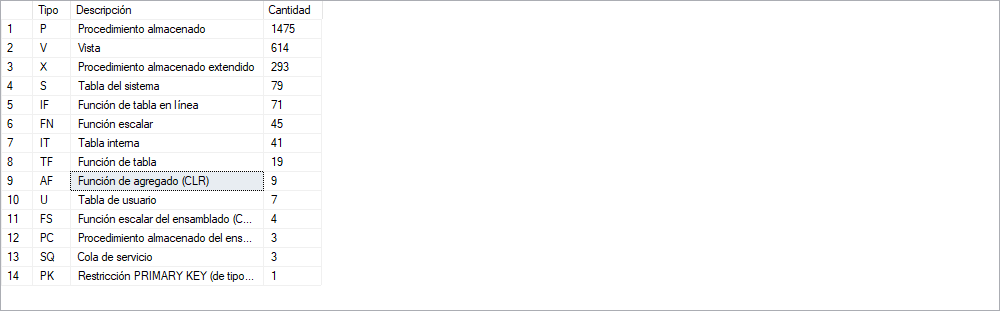

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> CHOOSE </font>**
</td>
</tr>
</table>

El término "CHOOSE" se refiere a una función que permite seleccionar un valor de una lista basada en un índice.

Es una función diferente a CASE, pero también se usa para manejar condiciones y devolver resultados.

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

#### **<font color="#000000"> Sintaxis</font>**
</td>
</tr>
</table>

```
CHOOSE(indice, valor1, valor2, valor3, ...)
```



```
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) AS Edad
FROM Beneficiario
GO
```



<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> Formas de colocar la fecha en una consulta </font>**
</td>
</tr>
</table>



```
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) AS Edad
FROM Beneficiario
GO
```





```
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '2004-07-31')/365.256363004) AS Edad
FROM Beneficiario
GO
```





```
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
GO
```



<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000">  Operadores de relación</font>**

</td>
</tr>
</table>

| **Operador** | **Descripción**                                      |
|--------------|------------------------------------------------------|
| `=`          | Igual a: compara si dos valores son iguales.        |
| `<>` o `!=`  | Diferente de: verifica si dos valores no son iguales.|
| `>`          | Mayor que: comprueba si el valor de la izquierda es mayor que el de la derecha. |
| `<`          | Menor que: comprueba si el valor de la izquierda es menor que el de la derecha. |
| `>=`         | Mayor o igual que: comprueba si el valor de la izquierda es mayor o igual al de la derecha. |
| `<=`         | Menor o igual que: comprueba si el valor de la izquierda es menor o igual al de la derecha. |
| `BETWEEN ... AND ...` | Verifica si un valor se encuentra dentro de un rango especificado, incluyendo los límites. |
| `LIKE`       | Se utiliza para buscar un patrón específico en una columna de texto. Ejemplo: `LIKE 'A%'` (comienza con A). |
| `IN (...)`   | Comprueba si un valor está dentro de un conjunto de valores especificados. Ejemplo: `IN (1, 2, 3)`. |
| `IS NULL`    | Verifica si un valor es `NULL`.                     |
| `IS NOT NULL`| Verifica si un valor no es `NULL`.                   |

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000">  Operadores Lógicos</font>**

</td>
</tr>
</table>

| **Operador** | **Descripción**                                               |
|--------------|---------------------------------------------------------------|
| `AND`        | Devuelve verdadero si ambas condiciones son verdaderas.      |
| `OR`         | Devuelve verdadero si al menos una de las condiciones es verdadera. |
| `NOT`        | Invierte el valor lógico de la condición; devuelve verdadero si la condición es falsa. |

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> = </font>**
</td>
</tr>
</table>



```
-- Mostrar todos los productos que cuestan 20 dólares
USE deltron
GO
SELECT cod_prd_in, cod_prd_vc, nom_prd_vc, pre_ven_prd_mo
FROM Almacen.producto
WHERE pre_ven_prd_mo = 20
GO
```



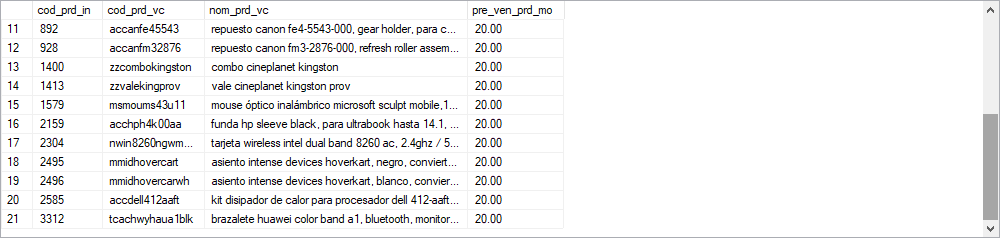



```
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE
	fec_nac_ben_da = '20040115'
GO
```



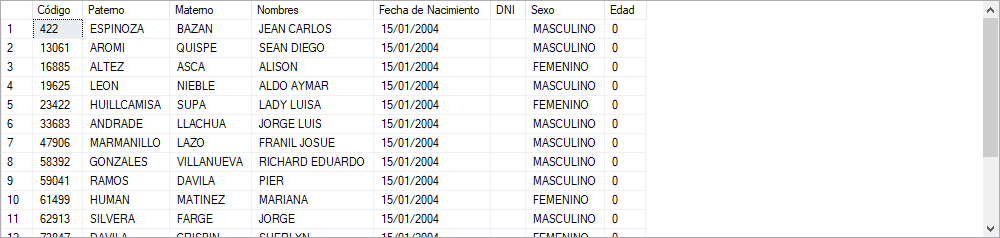



```
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE
	pat_ben_vc = 'LUIS'
GO
```



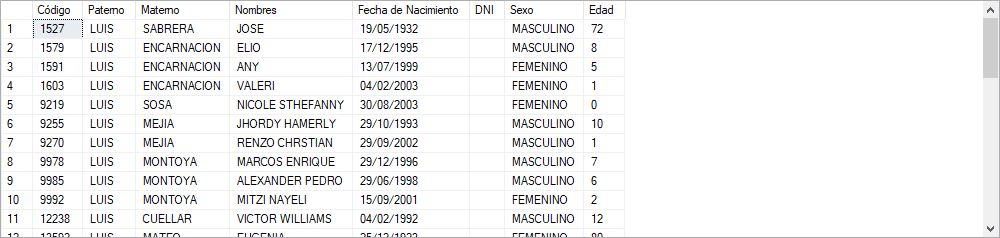

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> <> o != </font>**
</td>
</tr>
</table>



```
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE
	cod_sex_bi != 0
GO
```



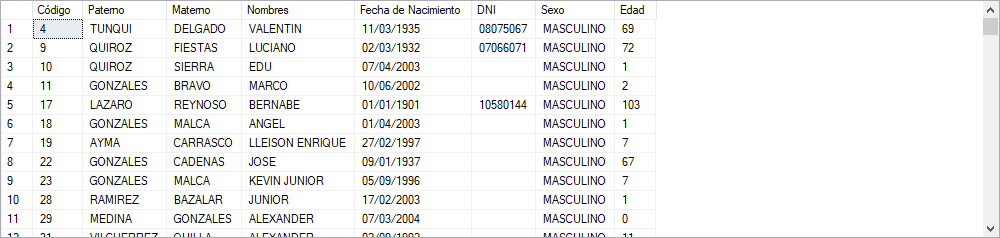

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> >= </font>**
</td>
</tr>
</table>



```
-- Mostrar todos los productos cuyo precio es >= 6000
USE deltron
GO
SELECT cod_prd_in, cod_prd_vc, nom_prd_vc, pre_ven_prd_mo
FROM Almacen.producto
WHERE pre_ven_prd_mo >= 6000
ORDER BY 4
GO
```



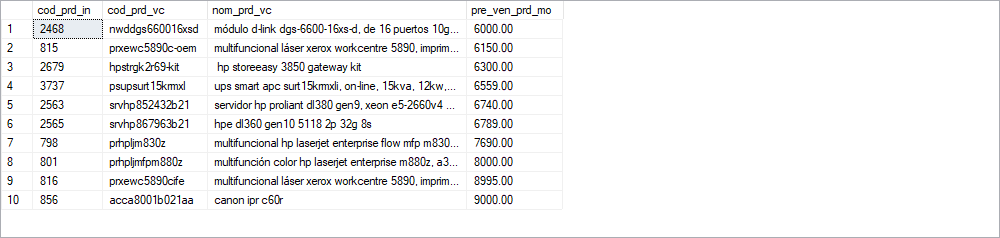

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> < </font>**
</td>
</tr>
</table>



```
-- Mostrar todos los productos cuyo precio es < 1
USE deltron
GO
SELECT cod_prd_in, cod_prd_vc, nom_prd_vc, pre_ven_prd_mo
FROM Almacen.producto
WHERE pre_ven_prd_mo < 1
ORDER BY 4
GO
```



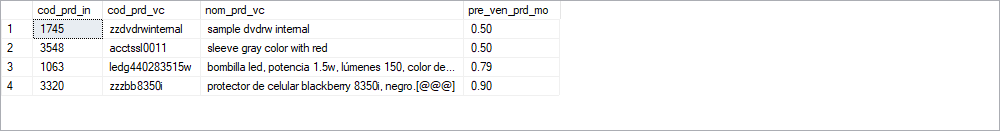

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> BETWEEN </font>**
</td>
</tr>
</table>

El operador **BETWEEN** se utiliza en SQL para filtrar resultados basados en un rango de valores.

Permite seleccionar registros donde un valor se encuentra dentro de un rango específico, incluyendo los límites del rango.



```
-- Mostrar todos los productos cuyo precio es de 10 a 30 dólares
USE deltron
GO
SELECT cod_prd_in, cod_prd_vc, nom_prd_vc, pre_ven_prd_mo
FROM Almacen.producto
WHERE pre_ven_prd_mo BETWEEN 10 AND 30
ORDER BY 4
GO
```





```
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE fec_nac_ben_da BETWEEN '20040115' AND '20040215'
ORDER BY fec_nac_ben_da
GO
```



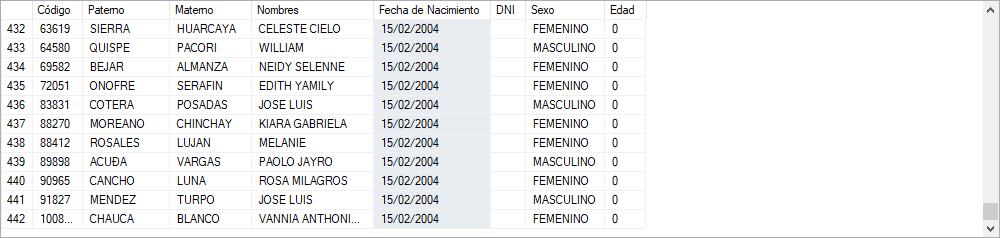

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> IN </font>**
</td>
</tr>
</table>

El operador **IN** se utiliza en SQL para comprobar si un valor dado está presente dentro de un conjunto de valores definidos.

Es una forma eficiente de filtrar registros sin tener que usar múltiples condiciones con el operador OR.



```
/*
	Mostrar los beneficiarios cuyo apellido paterno es LUIS, CARLOS, ROJAS
*/
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE pat_ben_vc IN ('LUIS', 'CARLOS', 'ROJAS')
ORDER BY 2
GO

```



<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> IS NULL </font>**
</td>
</tr>
</table>



```
/*
Northwind: Mostrar todas las ordenes que no han sido entregadas.
*/

USE Northwind
GO
SELECT OrderID, CustomerID, EmployeeID, OrderDate, RequiredDate, ShippedDate
FROM Orders
WHERE ShippedDate IS NULL
GO
```



<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> IS NOT NULL </font>**
</td>
</tr>
</table>



```
/*
Northwind: Mostrar todas las ordenes que han sido entregadas.
*/

USE Northwind
GO
SELECT OrderID, CustomerID, EmployeeID, OrderDate, RequiredDate, ShippedDate
FROM Orders
WHERE ShippedDate IS NOT NULL
GO
```



<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> AND </font>**
</td>
</tr>
</table>



```
/*
	Mostrar los beneficiarios cuyo apellido paterno es LUIS, CARLOS, ROJAS
*/
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE pat_ben_vc = 'QUISPE' AND mat_ben_vc = 'QUISPE'
ORDER BY 2
GO
```



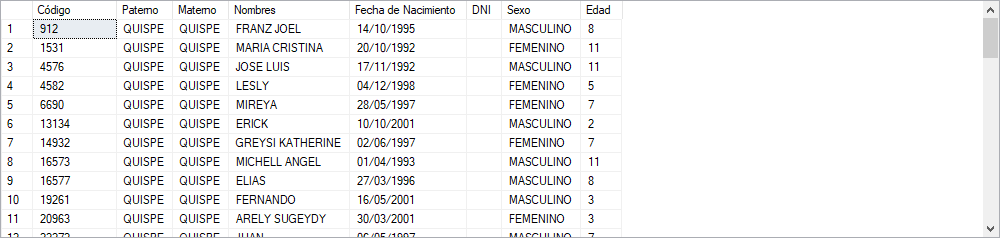

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> OR </font>**
</td>
</tr>
</table>



```
-- Mostrar todos los productos cuyo precio es de 10 a 30 dólares
USE deltron
GO
SELECT cod_prd_in, cod_prd_vc, nom_prd_vc, pre_ven_prd_mo
FROM Almacen.producto
WHERE pre_ven_prd_mo = 20 OR pre_ven_prd_mo = 10
ORDER BY 4
GO
```



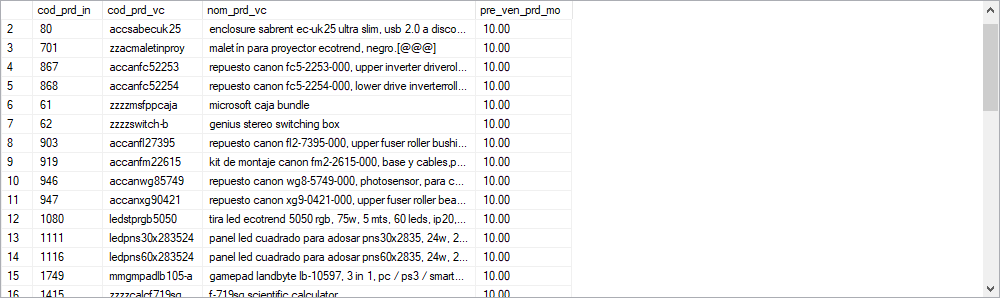

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> AND y OR </font>**
</td>
</tr>
</table>



```
/*
	Mostrar los beneficiarios ancianos en el Programa del Vaso de Leche
	Ancianos femeninos >= 60 años
	Ancianos masculinos >= 65 años
*/
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE
	(
			CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) >= 60
		AND
			cod_sex_bi= 0
	)
	OR
	(
			CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) >= 65
		AND
			cod_sex_bi= 1
	)
ORDER BY 2
GO
```



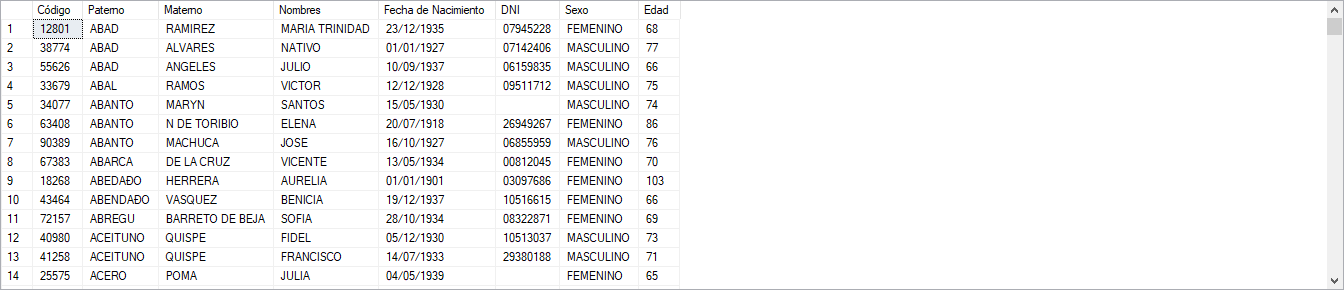

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> LIKE </font>**
</td>
</tr>
</table>

El operador **LIKE** en SQL es una herramienta utilizada en la cláusula WHERE para buscar patrones en columnas de tipo texto.

Permite realizar consultas más flexibles y específicas al filtrar resultados en función de coincidencias parciales en cadenas de texto.

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

#### **<font color="#000000"> Caracteres Comodín</font>**
</td>
</tr>
</table>

>* **%**: Representa cero o más caracteres. Se puede usar en cualquier parte del patrón.
>* **_**: Representa un solo carácter. Se puede usar para especificar la posición de un carácter exacto en el patrón.



```
/*
	Mostrar los beneficiarios cuyo apellido paterno comience con la letra P
*/
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE
	pat_ben_vc LIKE 'p%'
ORDER BY 2
GO
```



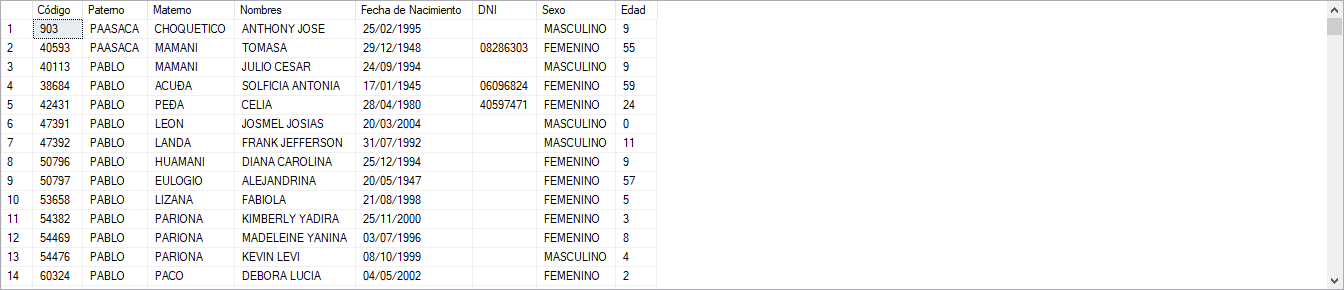



```
/*
	Mostrar los beneficiarios cuyo apellido paterno termine con la letra Y
*/
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE
	pat_ben_vc LIKE '%Y'
ORDER BY 2
GO

```



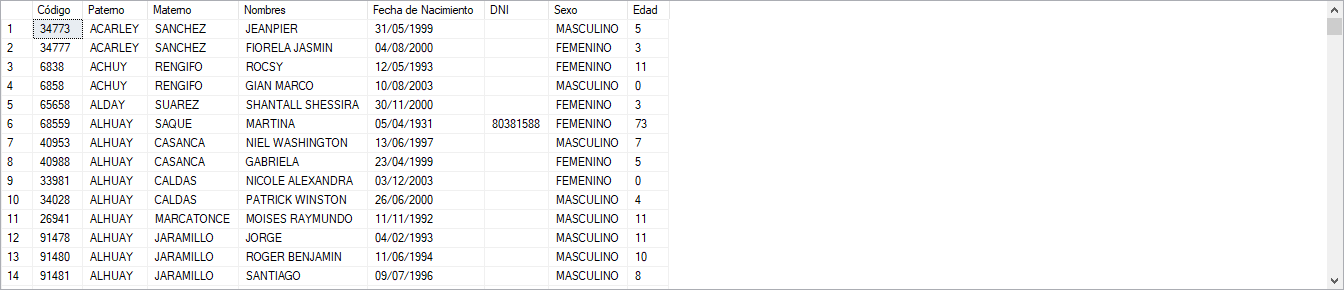



```
/*
	Mostrar los beneficiarios cuyo apellido paterno contenga la palabra 'AMOR'
*/
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE
	pat_ben_vc LIKE '%AMOR%'
ORDER BY 2
GO
```



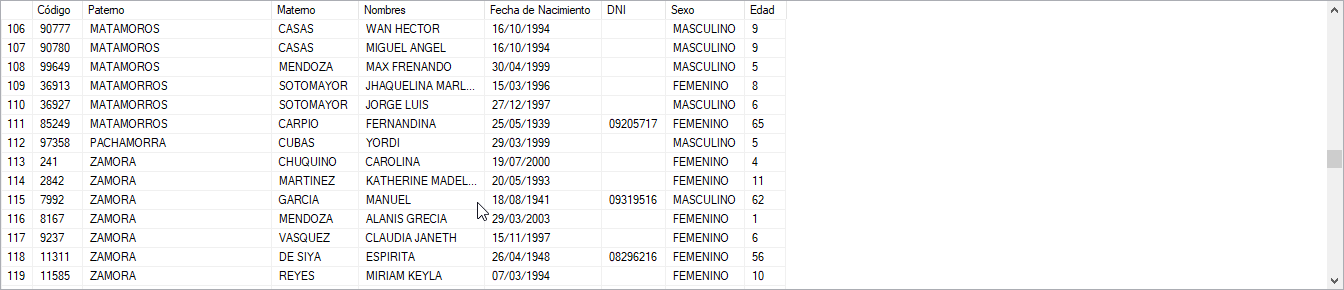



```
/*
	Mostrar los beneficiarios cuyo apellido paterno en su tercer caracter es la letra Y
*/
USE pvl
GO
SELECT
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE
	pat_ben_vc LIKE '__[Y]%'
ORDER BY 2
GO
```



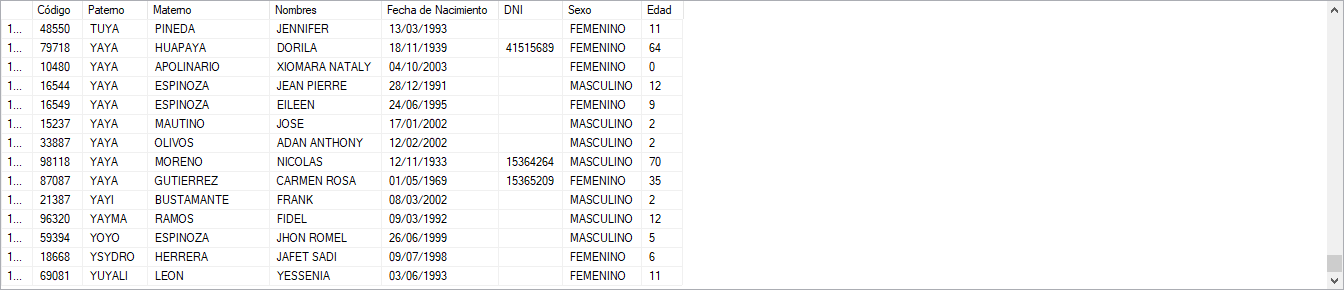



```
/*
	Mostrar los beneficiarios cuyo apellido
	paterno en su tercer caracter es la letra M, P o R
*/
USE pvl
GO
SELECT
	SUBSTRING(pat_ben_vc, 3, 1) AS Caracter,
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE
	pat_ben_vc LIKE '__[MPR]%'
ORDER BY 1, 3
GO
```



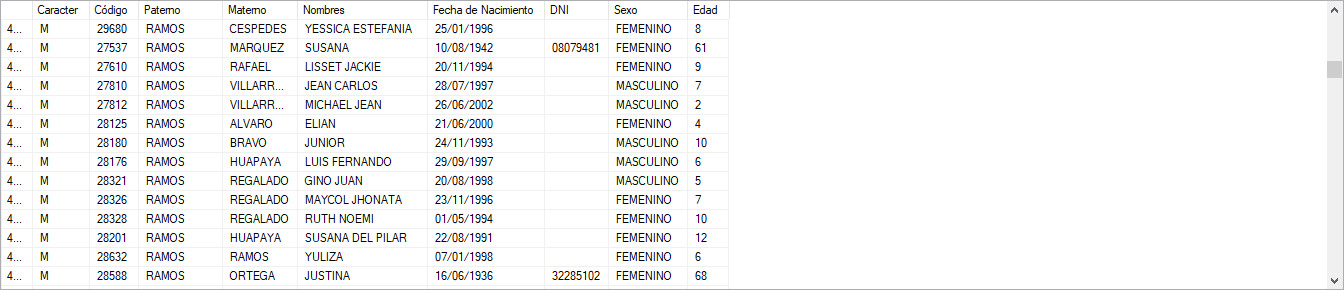



```
/*
	Mostrar los beneficiarios cuyo apellido
	paterno en su tercer caracter es la letra 'J' hasta la letra 'R'
*/
USE pvl
GO
SELECT
	SUBSTRING(pat_ben_vc, 3, 1) AS Caracter,
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE
	pat_ben_vc LIKE '__[J-R]%'
ORDER BY 1, 3
GO
```



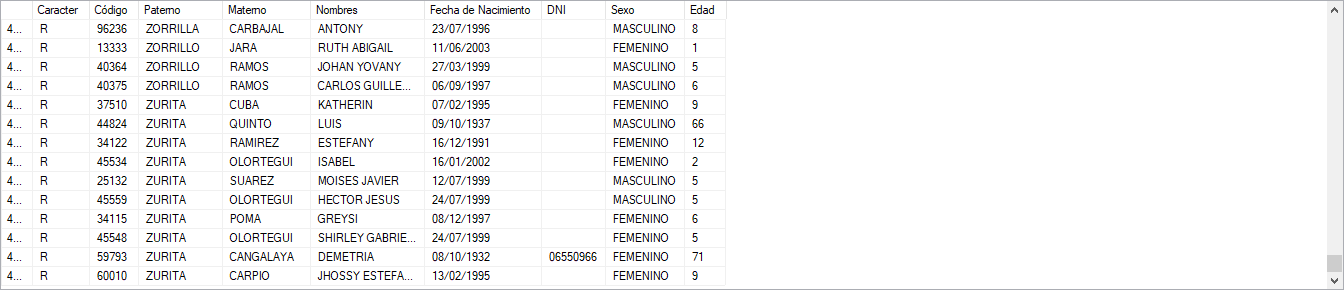



```
/*
	Mostrar los beneficiarios cuyo apellido
	paterno en su tercer caracter NO SEA la letra 'J' hasta la letra 'R'
*/
USE pvl
GO
SELECT
	SUBSTRING(pat_ben_vc, 3, 1) AS Caracter,
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE
	pat_ben_vc NOT LIKE '__[J-R]%'
ORDER BY 1, 3
GO
```



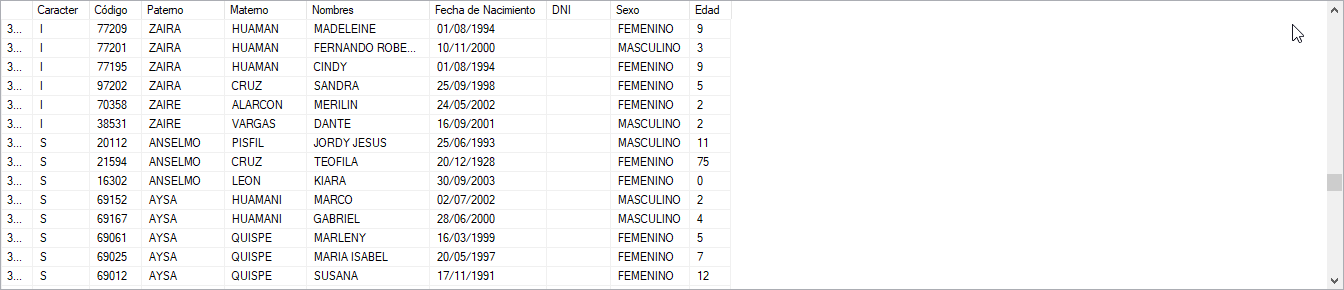



```
/*
	Mostrar los beneficiarios cuyo apellido
	paterno en su tercer caracter NO SEA la letra 'J' hasta la letra 'R'
*/
USE pvl
GO
SELECT
	SUBSTRING(pat_ben_vc, 3, 1) AS Caracter,
    cod_ben_in AS Código,
    pat_ben_vc AS Paterno,
    mat_ben_vc AS Materno,
    nom_ben_vc AS Nombres,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
    dni_ben_ch AS DNI,
    CHOOSE(cod_sex_bi+1, 'FEMENINO', 'MASCULINO') Sexo,
    CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, CONVERT(DATE, '31/07/2004', 103) )/365.256363004) AS Edad
FROM Beneficiario
WHERE
	pat_ben_vc LIKE '__[^J-R]%'
ORDER BY 1, 3
GO
```



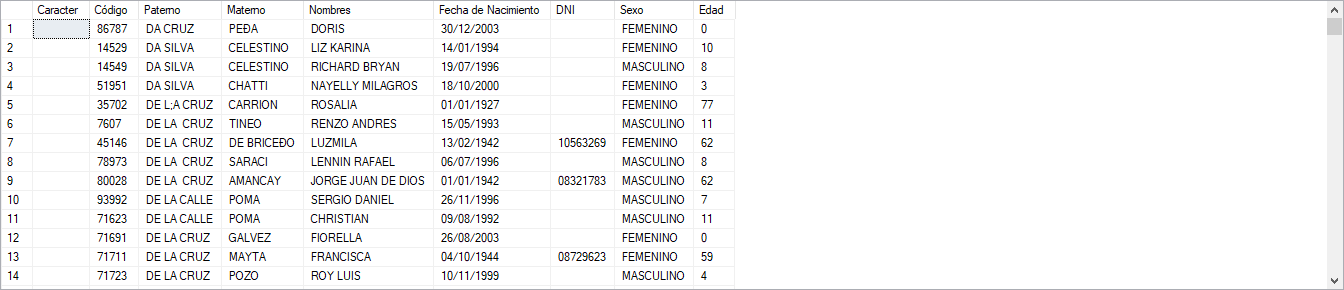

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000">  UNION</font>**

</td>
</tr>
</table>

La cláusula UNION en SQL Server se utiliza para combinar los resultados de dos o más consultas SELECT.

Al usar UNION, se eliminan los duplicados de los resultados, y se devuelven solo los registros únicos.



```
USE [Northwind]
GO
SELECT
	LTRIM([EmployeeID]) AS Código
      ,[TitleOfCourtesy] + ' ' +[LastName] + ', ' +[FirstName] AS Cliente
      ,[Address]
      ,[City]
      ,[Region]
      ,[PostalCode]
      ,[Country]
      ,[HomePhone]
  FROM [dbo].[Employees]
UNION
SELECT  [CustomerID]
      ,[CompanyName]
      
      ,[Address]
      ,[City]
      ,[Region]
      ,[PostalCode]
      ,[Country]
      ,[Phone]
FROM [dbo].[Customers]
GO
```



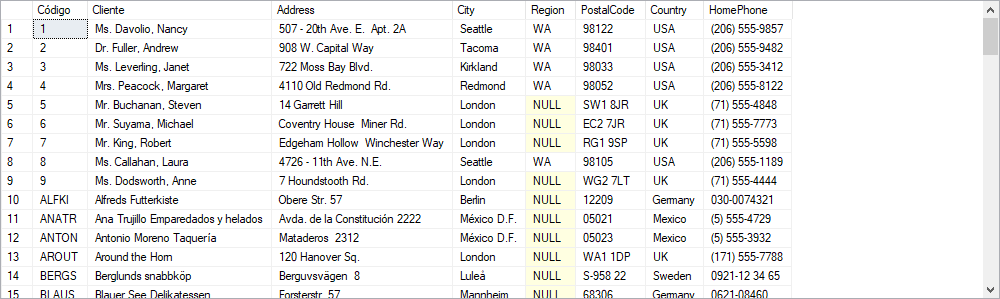



```
/*
Mostrar los apellidos paternos y maternos diferentes
*/
USE pvl
GO
SELECT pat_ben_vc
FROM Beneficiario
UNION
SELECT mat_ben_vc
FROM Beneficiario
```



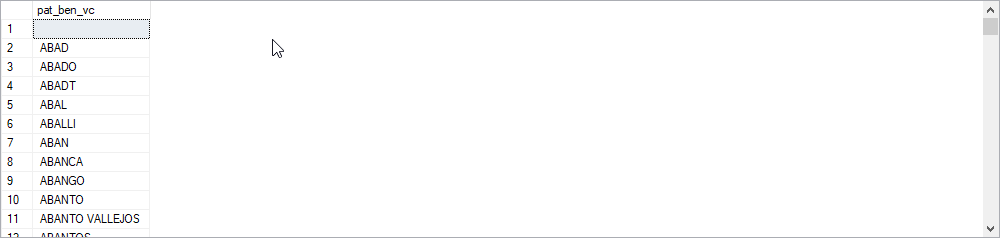



```
/*
Mostrar los 5 apellidos que más se repiten
en la base de datos PVL considerando los apellidos
paternos y maternos
NOTA.- UNION ALL no elimina repetidos
*/
USE pvl
GO
-- SUBCONSULTA
SELECT TOP 5
	pat_ben_vc AS Apellido,
	COUNT(*) AS Cantidad
FROM
(
	SELECT pat_ben_vc
	FROM Beneficiario
	UNION ALL
	SELECT mat_ben_vc
	FROM Beneficiario
) AS SC
GROUP BY pat_ben_vc
ORDER BY 2 DESC
GO
```



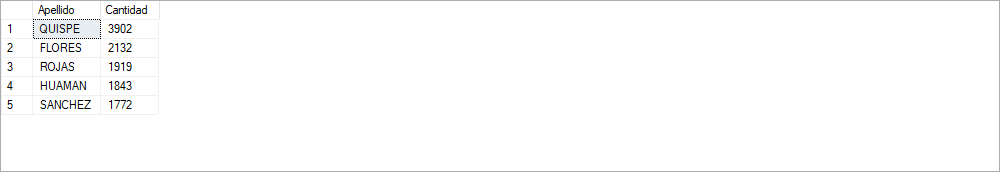

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Combinación interna - INNER JOIN</font>**

</td>
</tr>
</table>

El INNER JOIN en SQL Server se utiliza para combinar filas de dos o más tablas basándose en una relación lógica entre ellas.

Este tipo de unión devuelve solo las filas que tienen valores coincidentes en ambas tablas.

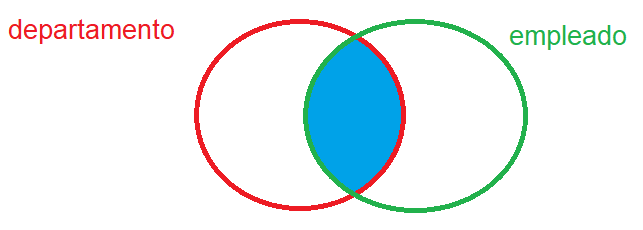



```
USE ConsultasComplejas
GO
SELECT *
FROM departamento d
INNER JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
GO
```



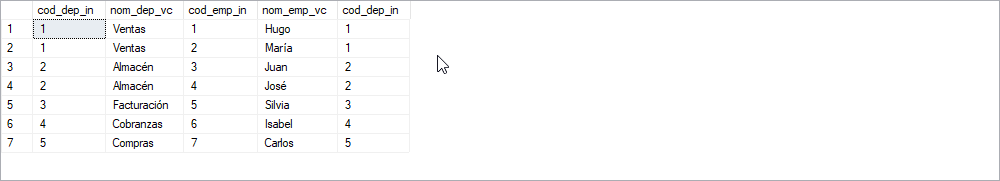

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Combinación externa izquierda - LEFT OUTER JOIN</font>**

</td>
</tr>
</table>

El LEFT OUTER JOIN en SQL Server se utiliza para combinar filas de dos o más tablas, devolviendo todas las filas de la tabla izquierda y las filas coincidentes de la tabla derecha.

Si no hay coincidencias en la tabla derecha, se devolverán NULL en las columnas de la tabla derecha.

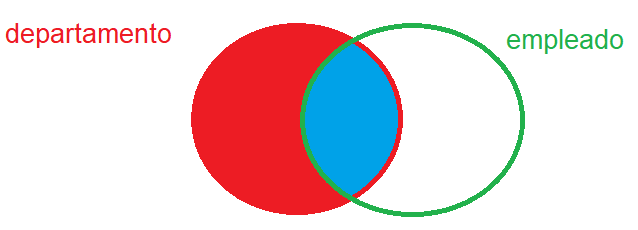



```
USE ConsultasComplejas
GO
SELECT *
FROM departamento d
LEFT OUTER JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
GO
```



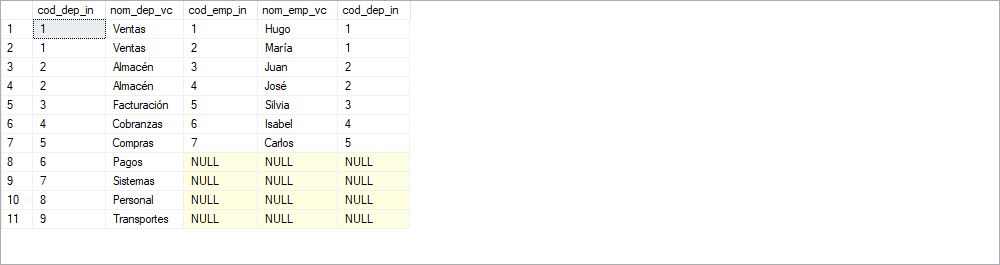

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Combinación externa derecha - RIGHT OUTER JOIN</font>**

</td>
</tr>
</table>

El RIGHT OUTER JOIN en SQL Server se utiliza para combinar filas de dos o más tablas, devolviendo todas las filas de la tabla derecha y las filas coincidentes de la tabla izquierda.

Si no hay coincidencias en la tabla izquierda, se devolverán NULL en las columnas de la tabla izquierda.

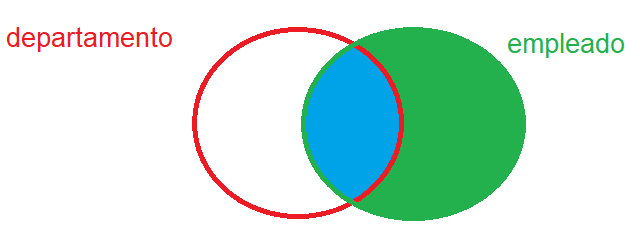

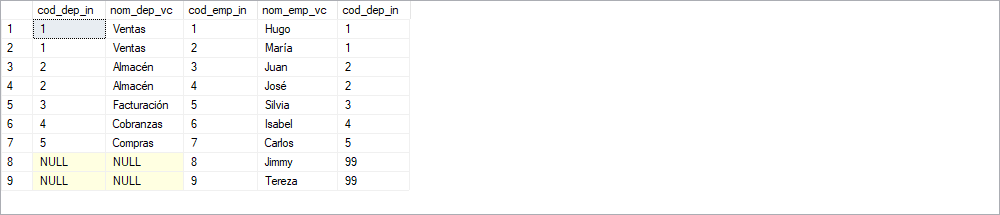

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Combinación externa completa - FULL OUTER JOIN</font>**

</td>
</tr>
</table>

El FULL OUTER JOIN en SQL Server se utiliza para combinar filas de dos o más tablas, devolviendo todas las filas de ambas tablas.

Esto significa que se incluirán todas las filas de la tabla izquierda y todas las filas de la tabla derecha.

Si no hay coincidencias, se llenarán las columnas con NULL en las áreas donde no haya datos coincidentes.

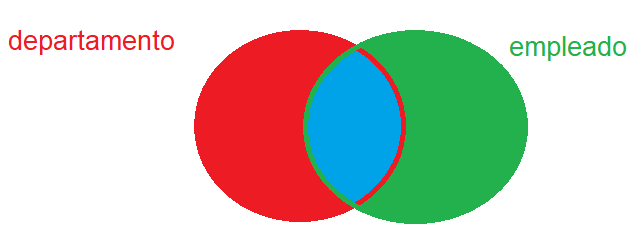



```
USE ConsultasComplejas
GO
SELECT *
FROM departamento d
FULL OUTER JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
GO
```



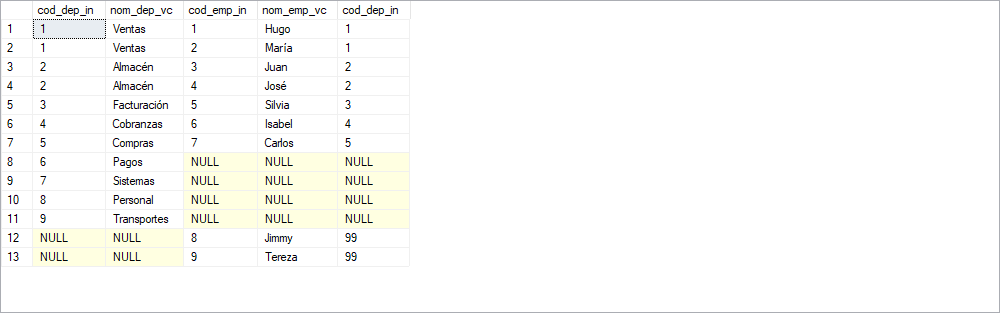

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Anticombinación izquierda</font>**

</td>
</tr>
</table>

La anticombinación izquierda (o left anti join) en SQL Server es un concepto que se utiliza para encontrar filas en la tabla izquierda que no tienen coincidencias en la tabla derecha.

Es una forma de filtrar los resultados para mostrar solo aquellos registros que no están relacionados con los de la otra tabla.

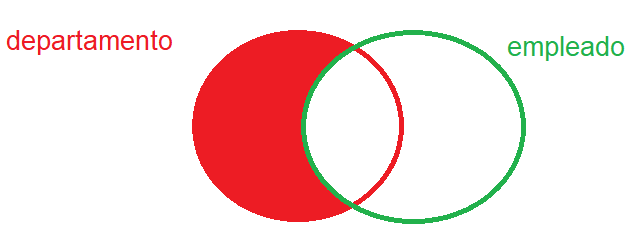



```
USE ConsultasComplejas
GO
SELECT d.*
FROM departamento d
LEFT OUTER JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
WHERE e.cod_emp_in IS NULL
GO
```



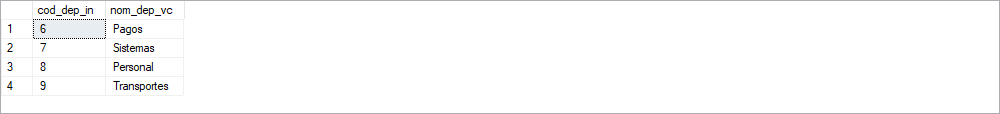

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Anticombinación derecha</font>**

</td>
</tr>
</table>

La anticombinación derecha (o right anti join) en SQL Server es un concepto que se utiliza para encontrar filas en la tabla derecha que no tienen coincidencias en la tabla izquierda.

Es útil para filtrar resultados de manera que solo se muestren aquellos registros que no están relacionados con los de la otra tabla.

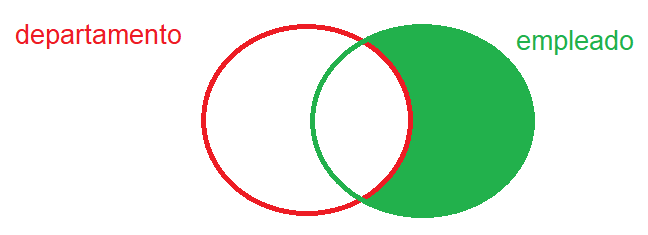



```
USE ConsultasComplejas
GO
SELECT e.*
FROM departamento d
RIGHT OUTER JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
WHERE d.cod_dep_in IS NULL
GO
```



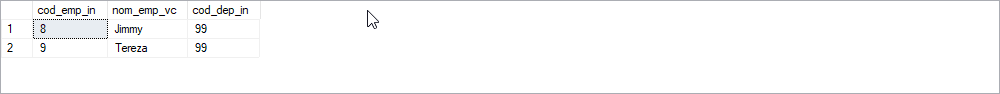



```
/*
Mostrar las utilidades de ventas por internet
por categoría usando la base de datos AdventureWorksDW.
*/
USE AdventureWorksDW2022
GO
SELECT TOP 5
	c.SpanishProductCategoryName AS Categoría,
	CONVERT
	(
		DECIMAL(19,2),
	SUM
	(
	f.OrderQuantity
	*
	(
		f.UnitPrice
		*
		(
			1 -
			IIF
			(
					f.OrderDate>=p.StartDate
				AND
					f.OrderDate<=p.EndDate
				AND
					f.OrderQuantity >= ISNULL(p.MinQty, 1)
				AND
					f.OrderQuantity <= ISNULL(p.MaxQty, 100000),
				p.DiscountPct,
				0
			)
		)
		-
		f.ProductStandardCost
		)
		)) AS Utilidad
FROM FactInternetSales f
INNER JOIN DimPromotion p
ON p.PromotionKey = f.PromotionKey
INNER JOIN DimProduct prd
ON f.ProductKey = prd.ProductKey
INNER JOIN DimProductSubcategory sc
ON sc.ProductSubcategoryKey = prd.ProductSubcategoryKey
INNER JOIN DimProductCategory c
ON c.ProductCategoryKey=sc.ProductCategoryKey
GROUP BY c.SpanishProductCategoryName
ORDER BY 2 DESC
```



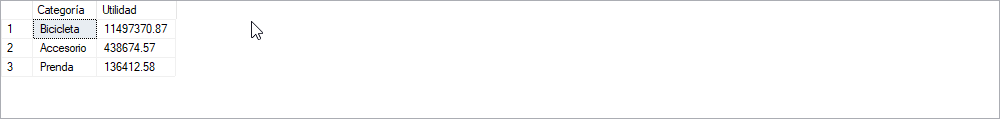